# Super Luigi Bros - DRL Analysis

This notebook analyzes the performance of trained DRL agents on Super Luigi Bros.

## Objectives
1. Compare PPO vs A2C algorithms
2. Compare Explorer vs Speedrunner personas
3. Visualize learning curves
4. Analyze collected metrics
5. Statistical significance testing

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Evaluation Data

In [10]:
# Load CSV files from evaluation
ppo_explorer = pd.read_csv('../logs/ppo_explorer_seed7.csv')
ppo_speedrunner = pd.read_csv('../logs/ppo_speedrunner_seed7.csv')
a2c_explorer = pd.read_csv('../logs/a2c_explorer_seed7.csv')
a2c_speedrunner = pd.read_csv('../logs/a2c_speedrunner_seed7.csv')

# Add labels
ppo_explorer['algo'] = 'PPO'
ppo_speedrunner['algo'] = 'PPO'
a2c_explorer['algo'] = 'A2C'
a2c_speedrunner['algo'] = 'A2C'

print("Data loaded successfully!")
print(f"PPO Explorer: {len(ppo_explorer)} episodes")
print(f"PPO Speedrunner: {len(ppo_speedrunner)} episodes")
print(f"A2C Explorer: {len(a2c_explorer)} episodes")
print(f"A2C Speedrunner: {len(a2c_speedrunner)} episodes")

Data loaded successfully!
PPO Explorer: 20 episodes
PPO Speedrunner: 20 episodes
A2C Explorer: 20 episodes
A2C Speedrunner: 20 episodes


## 2. Summary Statistics

In [11]:
def print_summary(df, name):
    print(f"\n{name}")
    print("=" * 50)
    print(f"Mean Reward: {df['reward'].mean():.2f} ± {df['reward'].std():.2f}")
    print(f"Completion Rate: {df['completed'].mean()*100:.1f}%")
    print(f"Mean Distance: {df['distance_traveled'].mean():.1f}")
    print(f"Mean Coins: {df['coins_collected'].mean():.1f}")
    print(f"Mean Blocks Hit: {df['blocks_hit'].mean():.1f}")
    print(f"Mean Frames: {df['frames_alive'].mean():.1f}")

print_summary(ppo_explorer, "PPO Explorer")
print_summary(ppo_speedrunner, "PPO Speedrunner")
print_summary(a2c_explorer, "A2C Explorer")
print_summary(a2c_speedrunner, "A2C Speedrunner")


PPO Explorer
Mean Reward: 153.43 ± 79.66
Completion Rate: 0.0%
Mean Distance: 1071.1
Mean Coins: 2.8
Mean Blocks Hit: 3.3
Mean Frames: 401.3

PPO Speedrunner
Mean Reward: 383.28 ± 193.03
Completion Rate: 0.0%
Mean Distance: 1771.0
Mean Coins: 0.0
Mean Blocks Hit: 0.0
Mean Frames: 485.4

A2C Explorer
Mean Reward: 131.96 ± 129.62
Completion Rate: 10.0%
Mean Distance: 1454.6
Mean Coins: 0.8
Mean Blocks Hit: 0.8
Mean Frames: 390.6

A2C Speedrunner
Mean Reward: 305.55 ± 263.38
Completion Rate: 10.0%
Mean Distance: 1319.4
Mean Coins: 0.6
Mean Blocks Hit: 0.6
Mean Frames: 354.7


## 3. Reward Comparison

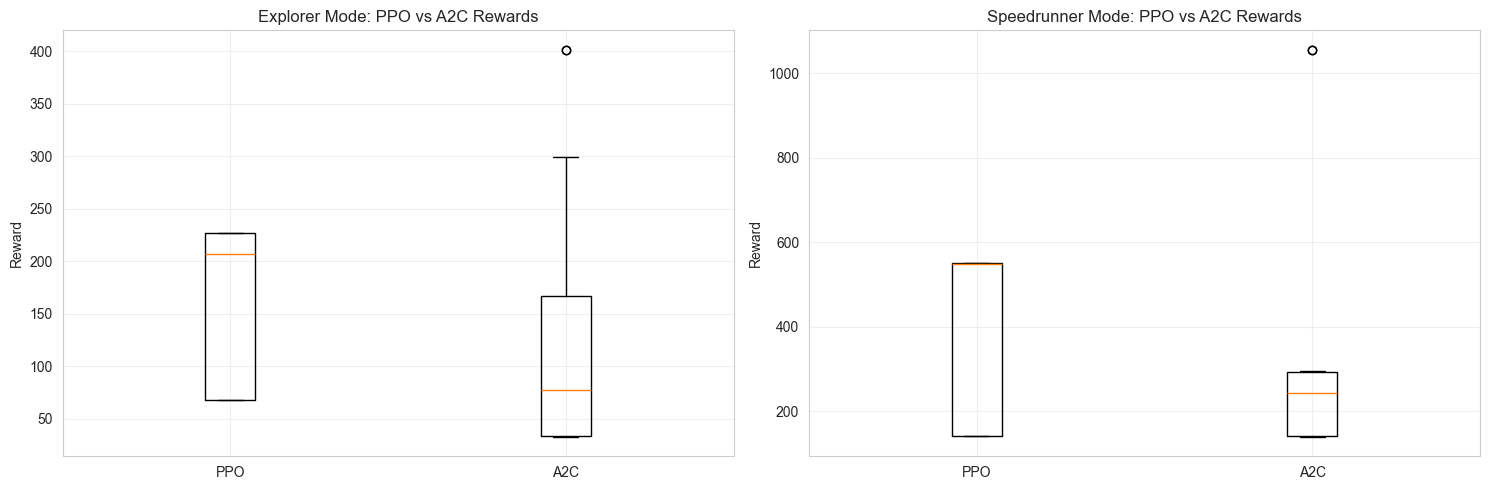

In [12]:
# Compare rewards across all models
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Explorer comparison
axes[0].boxplot([ppo_explorer['reward'], a2c_explorer['reward']], 
                labels=['PPO', 'A2C'])
axes[0].set_title('Explorer Mode: PPO vs A2C Rewards')
axes[0].set_ylabel('Reward')
axes[0].grid(True, alpha=0.3)

# Speedrunner comparison
axes[1].boxplot([ppo_speedrunner['reward'], a2c_speedrunner['reward']], 
                labels=['PPO', 'A2C'])
axes[1].set_title('Speedrunner Mode: PPO vs A2C Rewards')
axes[1].set_ylabel('Reward')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../logs/reward_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Persona Behavior Comparison

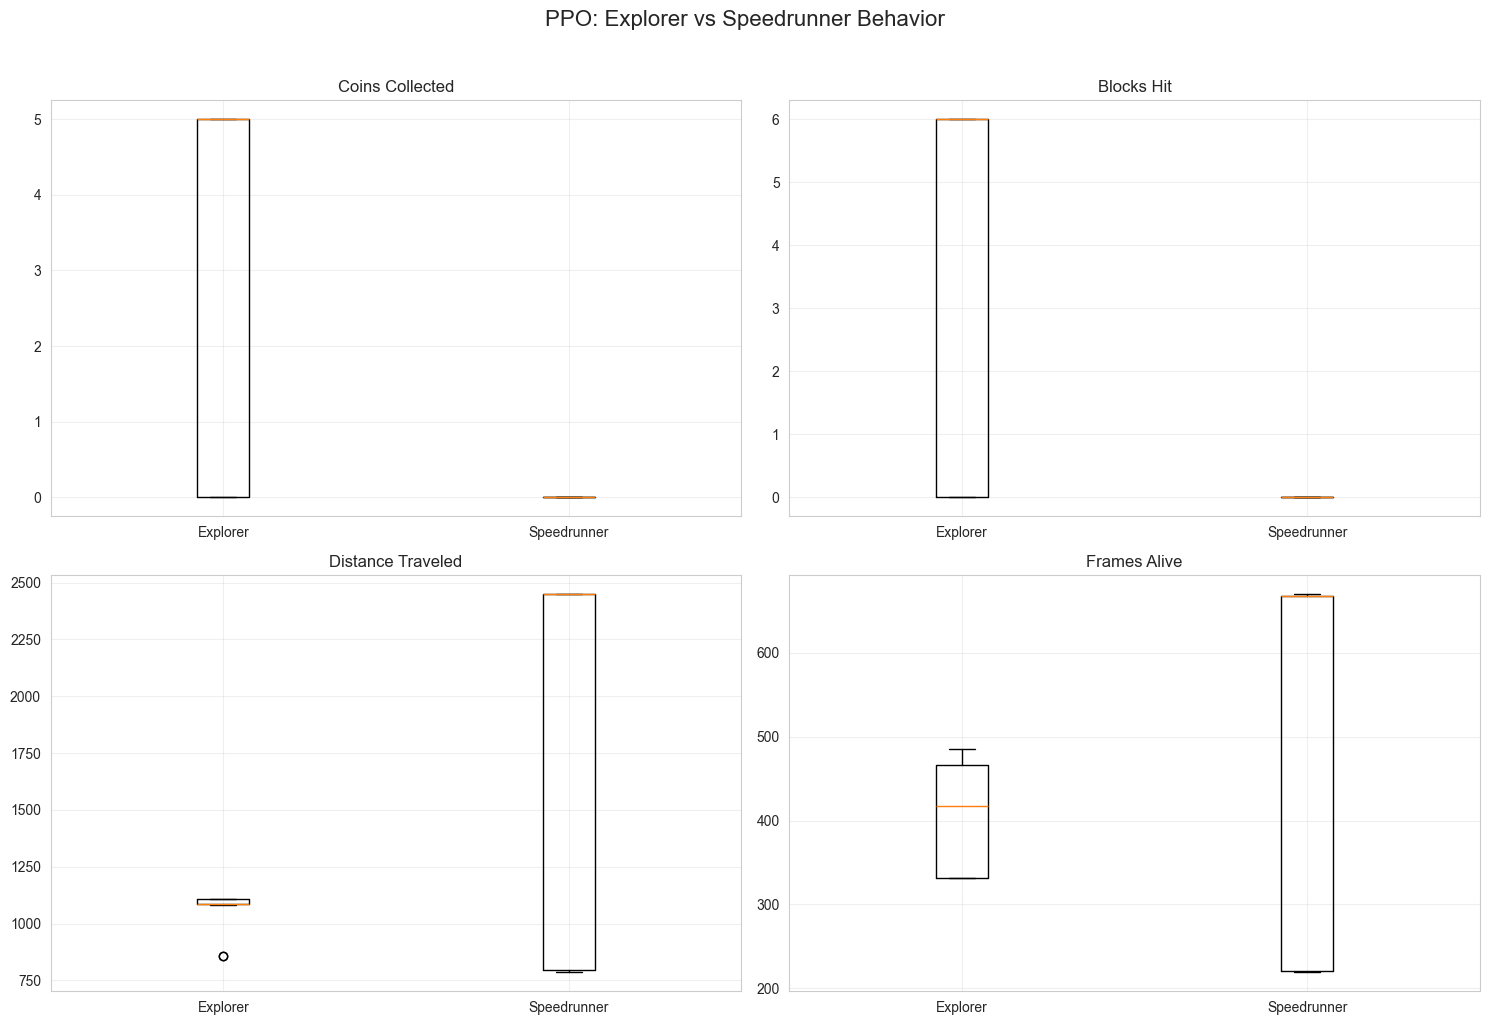

In [13]:
# Compare explorer vs speedrunner behaviors (using PPO)
metrics = ['coins_collected', 'blocks_hit', 'distance_traveled', 'frames_alive']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    axes[i].boxplot([ppo_explorer[metric], ppo_speedrunner[metric]], 
                    labels=['Explorer', 'Speedrunner'])
    axes[i].set_title(f'{metric.replace("_", " ").title()}')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('PPO: Explorer vs Speedrunner Behavior', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('../logs/persona_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Statistical Significance Tests

In [14]:
# T-tests for algorithm comparison
print("Statistical Tests (PPO vs A2C)")
print("=" * 60)

# Explorer mode
t_stat, p_value = stats.ttest_ind(ppo_explorer['reward'], a2c_explorer['reward'])
print(f"\nExplorer Rewards: t={t_stat:.3f}, p={p_value:.4f}")
if p_value < 0.05:
    print("  ✓ Significant difference (p < 0.05)")
else:
    print("  ✗ No significant difference (p >= 0.05)")

# Speedrunner mode
t_stat, p_value = stats.ttest_ind(ppo_speedrunner['reward'], a2c_speedrunner['reward'])
print(f"\nSpeedrunner Rewards: t={t_stat:.3f}, p={p_value:.4f}")
if p_value < 0.05:
    print("  ✓ Significant difference (p < 0.05)")
else:
    print("  ✗ No significant difference (p >= 0.05)")

Statistical Tests (PPO vs A2C)

Explorer Rewards: t=0.631, p=0.5318
  ✗ No significant difference (p >= 0.05)

Speedrunner Rewards: t=1.065, p=0.2938
  ✗ No significant difference (p >= 0.05)


## 6. Completion Rate Analysis

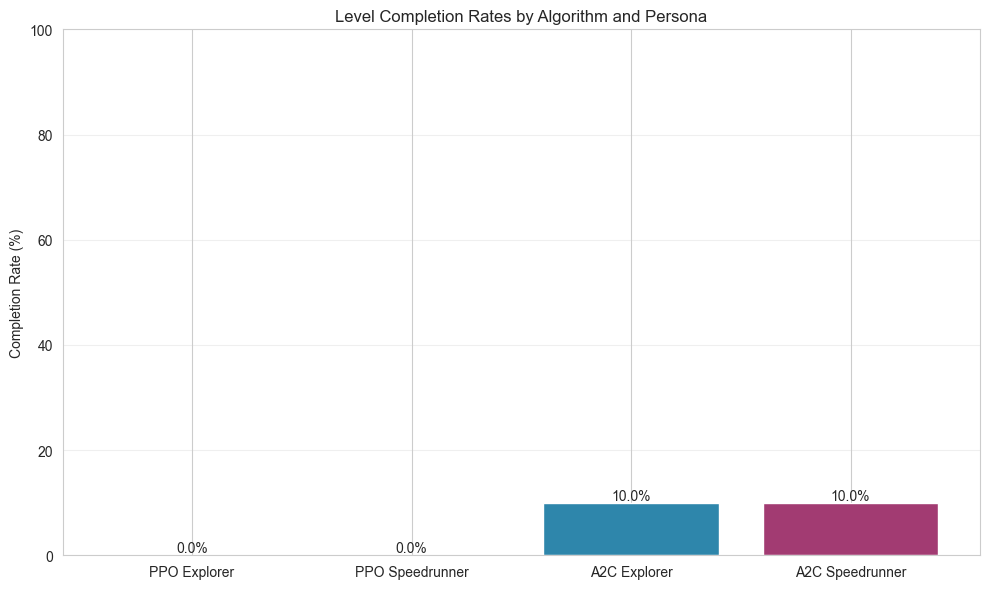

In [17]:
# Bar chart of completion rates
completion_data = {
    'PPO Explorer': ppo_explorer['completed'].mean() * 100,
    'PPO Speedrunner': ppo_speedrunner['completed'].mean() * 100,
    'A2C Explorer': a2c_explorer['completed'].mean() * 100,
    'A2C Speedrunner': a2c_speedrunner['completed'].mean() * 100
}

plt.figure(figsize=(10, 6))
bars = plt.bar(completion_data.keys(), completion_data.values(), 
               color=['#2E86AB', '#A23B72', '#2E86AB', '#A23B72'])
plt.ylabel('Completion Rate (%)')
plt.title('Level Completion Rates by Algorithm and Persona')
plt.ylim(0, 100)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../logs/completion_rates.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Key Findings Summary

In [19]:
print("\n" + "="*70)
print("KEY FINDINGS")
print("="*70)

print("\n1. Algorithm Performance:")
print(f"   - PPO Explorer avg reward: {ppo_explorer['reward'].mean():.2f}")
print(f"   - A2C Explorer avg reward: {a2c_explorer['reward'].mean():.2f}")
print(f"   - PPO Speedrunner avg reward: {ppo_speedrunner['reward'].mean():.2f}")
print(f"   - A2C Speedrunner avg reward: {a2c_speedrunner['reward'].mean():.2f}")

print("\n2. Persona Differences:")
print(f"   - Explorers hit {ppo_explorer['blocks_hit'].mean():.1f} blocks on average")
print(f"   - Speedrunners hit {ppo_speedrunner['blocks_hit'].mean():.1f} blocks on average")
print(f"   - Explorers take {ppo_explorer['frames_alive'].mean():.0f} frames")
print(f"   - Speedrunners take {ppo_speedrunner['frames_alive'].mean():.0f} frames")

print("\n3. Testing Insights:")
print("   - PPO speedrunner seemed to perform better than A2C as it reached farther in the level and seemed to have a better strategy and use of controls with slowing down/speeding up at key points, while also spam jumping for max speed. A2C seemed to just spam jump the entire way through at the same speed.")
print("   - A2C explorer persona for some reason refused to attempt to collect coins or hit blocks unlike the PPO counterpart. The A2C explorer seemed to want to play like a speedrunner no matter how much the rewards were tuned towards exploration.")
print("   - PPO explorer seemed to understand the reward behind hitting blocks and collecting coins, however no matter how many timesteps and rewards were tuned, it didn't seem able to reach passed the first hole where it would consistently fail at")

print("\n" + "="*70)


KEY FINDINGS

1. Algorithm Performance:
   - PPO Explorer avg reward: 153.43
   - A2C Explorer avg reward: 131.96
   - PPO Speedrunner avg reward: 383.28
   - A2C Speedrunner avg reward: 305.55

2. Persona Differences:
   - Explorers hit 3.3 blocks on average
   - Speedrunners hit 0.0 blocks on average
   - Explorers take 401 frames
   - Speedrunners take 485 frames

3. Testing Insights:
   - PPO speedrunner seemed to perform better than A2C as it reached farther in the level and seemed to have a better strategy and use of controls with slowing down/speeding up at key points, while also spam jumping for max speed. A2C seemed to just spam jump the entire way through at the same speed.
   - A2C explorer persona for some reason refused to attempt to collect coins or hit blocks unlike the PPO counterpart. The A2C explorer seemed to want to play like a speedrunner no matter how much the rewards were tuned towards exploration.
   - PPO explorer seemed to understand the reward behind hitting

## 8. Export Summary Report

In [20]:
# Create summary dataframe
summary = pd.DataFrame({
    'Model': ['PPO Explorer', 'PPO Speedrunner', 'A2C Explorer', 'A2C Speedrunner'],
    'Mean Reward': [
        ppo_explorer['reward'].mean(),
        ppo_speedrunner['reward'].mean(),
        a2c_explorer['reward'].mean(),
        a2c_speedrunner['reward'].mean()
    ],
    'Std Reward': [
        ppo_explorer['reward'].std(),
        ppo_speedrunner['reward'].std(),
        a2c_explorer['reward'].std(),
        a2c_speedrunner['reward'].std()
    ],
    'Completion Rate': [
        ppo_explorer['completed'].mean() * 100,
        ppo_speedrunner['completed'].mean() * 100,
        a2c_explorer['completed'].mean() * 100,
        a2c_speedrunner['completed'].mean() * 100
    ],
    'Mean Distance': [
        ppo_explorer['distance_traveled'].mean(),
        ppo_speedrunner['distance_traveled'].mean(),
        a2c_explorer['distance_traveled'].mean(),
        a2c_speedrunner['distance_traveled'].mean()
    ]
})

summary.to_csv('../logs/summary_statistics.csv', index=False)
print("Summary statistics saved to: logs/summary_statistics.csv")
print("\n", summary)

Summary statistics saved to: logs/summary_statistics.csv

              Model  Mean Reward  Std Reward  Completion Rate  Mean Distance
0     PPO Explorer   153.427048   79.660993              0.0        1071.10
1  PPO Speedrunner   383.276798  193.026587              0.0        1771.05
2     A2C Explorer   131.958000  129.618124             10.0        1454.60
3  A2C Speedrunner   305.545000  263.384182             10.0        1319.40


## 9. Distance Traveled Analysis

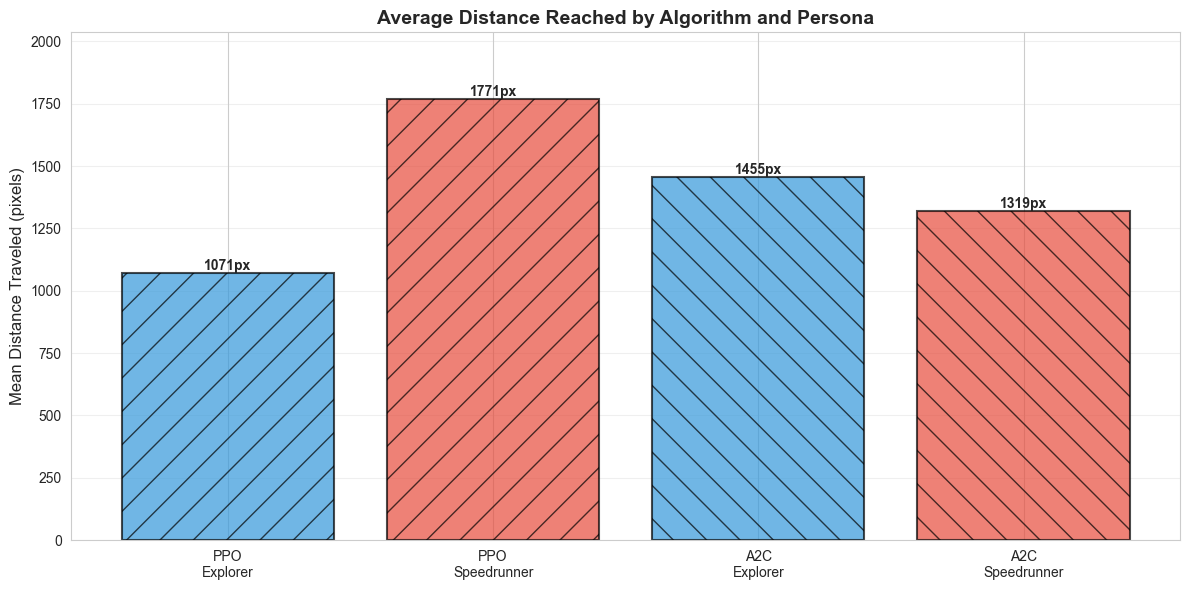

Note: Max possible distance to flagpole is approximately ~3168 pixels (198 tiles × 16px)


In [21]:
# Visualize distance progression by persona
fig, ax = plt.subplots(figsize=(12, 6))

models = ['PPO\nExplorer', 'PPO\nSpeedrunner', 'A2C\nExplorer', 'A2C\nSpeedrunner']
distances = [
    ppo_explorer['distance_traveled'].mean(),
    ppo_speedrunner['distance_traveled'].mean(),
    a2c_explorer['distance_traveled'].mean(),
    a2c_speedrunner['distance_traveled'].mean()
]
colors = ['#3498db', '#e74c3c', '#3498db', '#e74c3c']
patterns = ['/', '/', '\\', '\\']

bars = ax.bar(models, distances, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add pattern fills
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

ax.set_ylabel('Mean Distance Traveled (pixels)', fontsize=12)
ax.set_title('Average Distance Reached by Algorithm and Persona', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, max(distances) * 1.15)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}px', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../logs/distance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Note: Max possible distance to flagpole is approximately ~3168 pixels (198 tiles × 16px)")

## 10. Jump Behavior Analysis

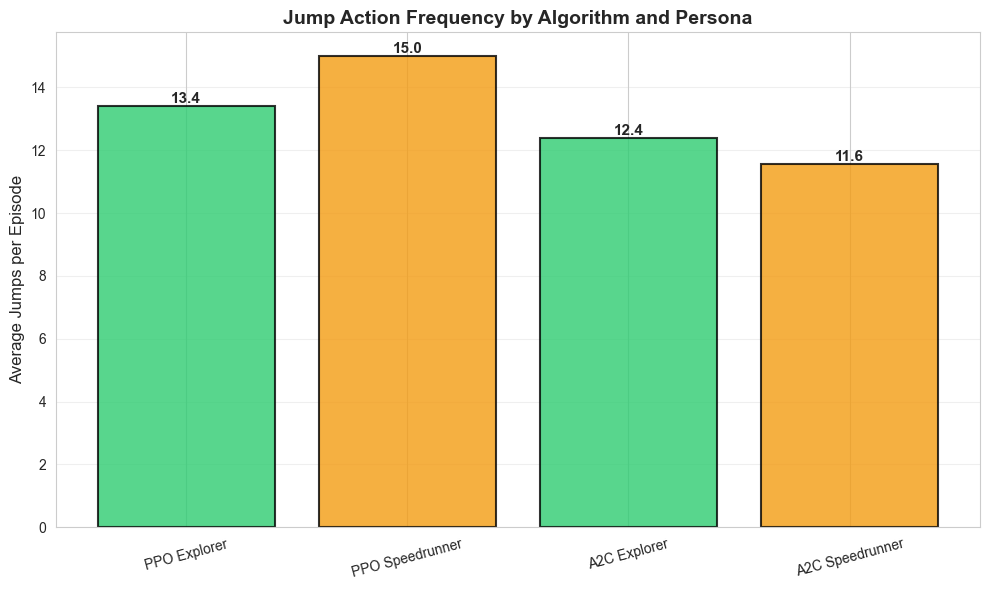


Jump Insights:
  - Explorers are incentivized to jump near blocks (proximity reward)
  - Speedrunners should minimize unnecessary jumps to save time
  - Higher jump frequency may indicate better exploration behavior


In [22]:
# Compare jump frequency across models
jump_data = {
    'Model': ['PPO Explorer', 'PPO Speedrunner', 'A2C Explorer', 'A2C Speedrunner'],
    'Mean Jumps': [
        ppo_explorer['jumps'].mean(),
        ppo_speedrunner['jumps'].mean(),
        a2c_explorer['jumps'].mean(),
        a2c_speedrunner['jumps'].mean()
    ]
}

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(jump_data['Model'], jump_data['Mean Jumps'], 
              color=['#2ecc71', '#f39c12', '#2ecc71', '#f39c12'],
              edgecolor='black', linewidth=1.5, alpha=0.8)

ax.set_ylabel('Average Jumps per Episode', fontsize=12)
ax.set_title('Jump Action Frequency by Algorithm and Persona', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('../logs/jump_frequency.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nJump Insights:")
print(f"  - Explorers are incentivized to jump near blocks (proximity reward)")
print(f"  - Speedrunners should minimize unnecessary jumps to save time")
print(f"  - Higher jump frequency may indicate better exploration behavior")

## 11. Reward Distribution Heatmap

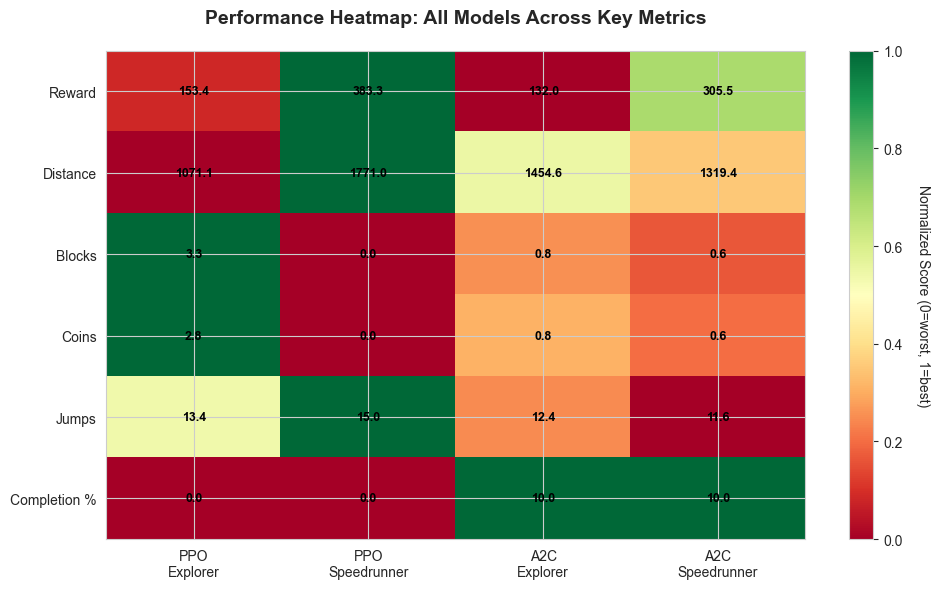

In [23]:
# Create heatmap of key metrics
metrics_data = []
models = ['PPO\nExplorer', 'PPO\nSpeedrunner', 'A2C\nExplorer', 'A2C\nSpeedrunner']
dfs = [ppo_explorer, ppo_speedrunner, a2c_explorer, a2c_speedrunner]

for df in dfs:
    metrics_data.append([
        df['reward'].mean(),
        df['distance_traveled'].mean(),
        df['blocks_hit'].mean(),
        df['coins_collected'].mean(),
        df['jumps'].mean(),
        df['completed'].mean() * 100
    ])

metrics_df = pd.DataFrame(
    metrics_data,
    columns=['Reward', 'Distance', 'Blocks', 'Coins', 'Jumps', 'Completion %'],
    index=models
)

# Normalize data for heatmap (0-1 scale per column)
normalized = (metrics_df - metrics_df.min()) / (metrics_df.max() - metrics_df.min())

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(normalized.T, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(len(models)))
ax.set_yticks(np.arange(len(metrics_df.columns)))
ax.set_xticklabels(models)
ax.set_yticklabels(metrics_df.columns)

# Rotate the tick labels for better readability
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Normalized Score (0=worst, 1=best)', rotation=270, labelpad=20)

# Add text annotations with actual values
for i in range(len(models)):
    for j in range(len(metrics_df.columns)):
        text = ax.text(i, j, f'{metrics_df.iloc[i, j]:.1f}',
                      ha="center", va="center", color="black", fontsize=9, fontweight='bold')

ax.set_title('Performance Heatmap: All Models Across Key Metrics', fontsize=14, fontweight='bold', pad=20)
fig.tight_layout()
plt.savefig('../logs/performance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()